### Project: Understanding Employee Attrition with Machine Learning 
### Activity: Logistic Regression - Model Evaluation on Up Sampled Data
### Model: Logistic Regression
### Author: Tawanda Nigel Chitapi
### Email: nigel.chitapi@gmail.com    
### Date: September 05, 2022
### Institution: BrainStation

In [1]:
# import packages

# the data science trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# model selection tools
from sklearn.model_selection import train_test_split

# scaler
from sklearn.preprocessing import StandardScaler

# linear models
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# SMOTE
from imblearn.over_sampling import SMOTE

The goal of this notebook is to perform upsampling on the the training data in order to solve the problem of imbalanced attrition classes. After balancing the data we will then re-instatiate the logistic regression model, evaluate the model and compare the results with those of the unsampled data.

The work-flow will be similar to that of the Unsampled data notebook for ease of flowing the steps.

In [2]:
# load our data 

employee_df = pd.read_csv('data/employee_attrition.csv')

In [3]:
# sanity check to see if our data loaded successfully

employee_df.head()

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Other,Technical Degree,Admin,Administrative,Nurse,Other.1,Therapist,Divorced,Married,Single
0,1313919,41,0,1102,1,2,1,2,1,94,...,0,0,0,0,1,0,0,0,0,1
1,1200302,49,0,279,8,1,1,3,0,61,...,0,0,0,0,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,1,0,0,0,1,0,0,0,0,1
3,1272912,33,0,1392,3,4,1,4,1,56,...,0,0,0,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,1,1,0,40,...,0,0,0,0,1,0,0,0,1,0


In [4]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeID                1676 non-null   int64
 1   Age                       1676 non-null   int64
 2   Attrition                 1676 non-null   int64
 3   DailyRate                 1676 non-null   int64
 4   DistanceFromHome          1676 non-null   int64
 5   Education                 1676 non-null   int64
 6   EmployeeCount             1676 non-null   int64
 7   EnvironmentSatisfaction   1676 non-null   int64
 8   Gender                    1676 non-null   int64
 9   HourlyRate                1676 non-null   int64
 10  JobInvolvement            1676 non-null   int64
 11  JobLevel                  1676 non-null   int64
 12  JobSatisfaction           1676 non-null   int64
 13  MonthlyIncome             1676 non-null   int64
 14  MonthlyRate               1676 non-null 

In [1]:
# features
X = employee_df.drop('Attrition', axis=1)

# target
y = employee_df['Attrition']

NameError: name 'employee_df' is not defined

In [6]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    stratify = y,
    random_state = 1
)

We have initiated an 70% train set and 30% test set split on our data 

Our dataset contains 50 columns, with the amount of data that we have (1676 rows), 50 columns are too wide a dimension puts our model at the risk of the curse of dimensionality. After we conducted feature engineering during data cleaning and processing, the number of features in our dataset incresed from 35 to 50.
In order to best predict our target variable we need to conduct some feature selection and select only those variables that best predict out target variable.
To achieve this we will use the Fisher - Chi-Squared test and assess the derived p-values to select on the best predictor with p-values less than the threshold of 0.05.
The Fisher - Chi-Squared test is applied on the training data because the selected features are used to train the model.

In [7]:
from sklearn.feature_selection import chi2

In [8]:
f_p_values = chi2(X, y)

f_p_values

(array([1.21143359e+03, 2.18075488e+02, 9.80042735e+02, 1.34752206e+02,
        9.14675779e-01, 0.00000000e+00, 7.62324266e+00, 4.26023102e-01,
        1.37660534e+01, 8.64185842e+00, 4.33138845e+01, 4.99790687e+00,
        2.15238646e+05, 1.25027767e+04, 1.15322155e+00, 0.00000000e+00,
        1.36592523e+02, 1.26983331e-02, 7.82147747e-03, 2.99901161e-01,
        0.00000000e+00, 3.81226029e+01, 4.97310855e+02, 2.98027378e+00,
        2.44735458e+00, 3.59223808e+02, 2.23346033e+02, 5.90028751e+01,
        2.07527896e+02, 1.08669784e+00, 1.07867314e+01, 1.71639456e+00,
        2.15864231e+00, 1.45973417e-01, 5.70868185e+00, 2.15412094e+00,
        2.11386774e-02, 1.56263236e+00, 2.29483170e+00, 6.51176112e-01,
        1.19062460e+00, 2.15572106e+00, 1.33078829e+01, 1.02725034e+00,
        9.96392145e+00, 1.71956394e+01, 1.09284509e+01, 1.20169006e+01,
        4.95438134e+01]),
 array([1.99742170e-265, 2.37780925e-049, 3.91110641e-215, 3.74056454e-031,
        3.38876833e-001, 1.0000000

The variable **f_p_values** refers to f-score, p-value values, the first array [0] represents f-scores and the second array [1] represent the p-values.

In [9]:
# create a series of p_values and match them to the relevant columns 

p_values = pd.Series(f_p_values[1],index = X.columns)

In [10]:
# sort the p_values in descending order 
p_values.sort_values(ascending = False , inplace = True)

Plot a bar graph of the column and relevant p_values to better identify and select preferred columns

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

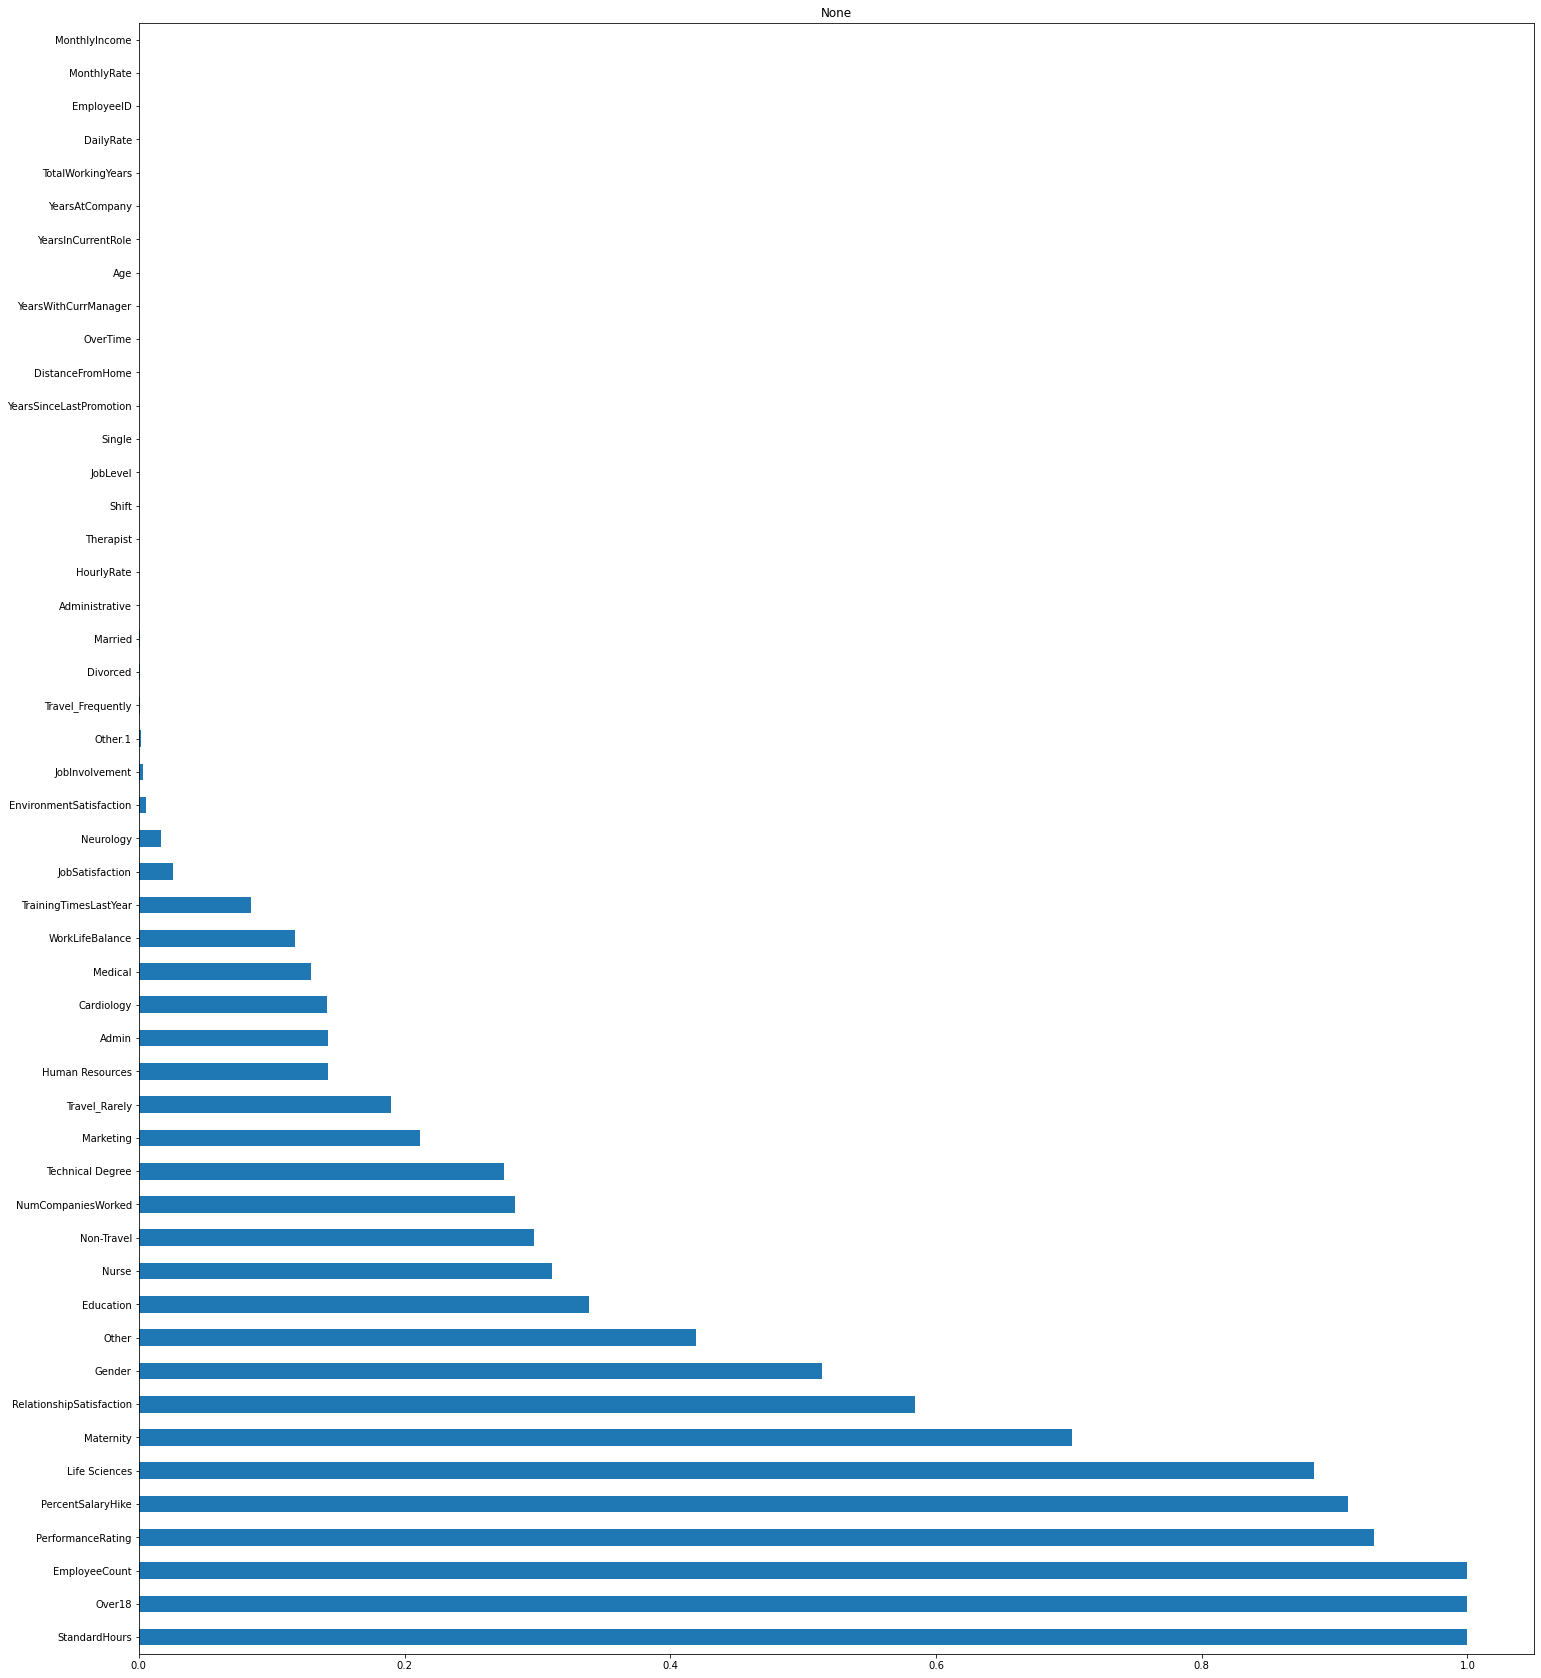

In [11]:
#Plot a bar graph
p_values.plot.barh(figsize= (25,30), subplots=True) 

In [12]:
# Newly Updated features
X = employee_df[['Age','DailyRate', 'DistanceFromHome', 'JobLevel','OverTime','Single',
               'Shift','TotalWorkingYears','Therapist', 'MonthlyRate', 'HourlyRate',
                 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
                 'YearsWithCurrManager','Travel_Frequently','Married', 'Divorced',
                 'Administrative']]

# target
y = employee_df['Attrition']

After observing the results from the plot above, we have selected features with p_value less than 0.05 as these will best predict our target variable. 

#### We will upsample our data using the SMOTE, an algorithm that performs data augmentation by creating synthetic data points based on the original data points. This will be instatiated and fit on the training data

In [13]:
# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_sm, y_train_sm = SMOTE(random_state=1).fit_resample(X_train, y_train)

In [14]:
# sanity check to see what SMOTE has done

print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    1034
1     139
Name: Attrition, dtype: int64


Resampled class distribution


0    1034
1    1034
Name: Attrition, dtype: int64

### Now that our features have been selected, and our data has been upsampled we will go on to scale our data.

#### Before we fit our data into any model it is very important that we scale our data since our features do not contain the same degree of values in them, we must scale them so that they are centred at mean = 0 and variance = 1 at the same level.

In [15]:
# we will use a standard scalar to scale our data 

In [16]:
# scale the sampled train data and the unsampled test data
ss_sm = StandardScaler().fit(X_train_sm)
X_train_sm_ss = ss_sm.transform(X_train_sm)
X_test_ss = ss_sm.transform(X_test)

In [17]:
# Instantiate
employee_logit = LogisticRegression(random_state=1)

# Fit
employee_logit.fit(X_train_sm_ss, y_train_sm)

# Score
print(employee_logit.score(X_train_sm_ss, y_train_sm))
print(employee_logit.score(X_test_ss, y_test))

0.9661508704061895
0.9324055666003976


After upsampling the data, the model performed at 97% accuracy on the training data and 93% accuracy on the test data. The model's training accuracy increased by 3 percentage points. These scores are still great, the delta between the two scores is only 3 percentage points and this could be deemed as a great performing model, however, at this point we can not deductively state that this is a great model.

We need to further granulate the performance matrics of the model and assess how accurate is is at predicting true positive and true negatives.

### Evaluation on Test Data

In [18]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

In [19]:
# predict classification
y_test_pred = employee_logit.predict(X_test_ss)

In [20]:
#Generate the (raw) confusion matrix:

cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[434,   9],
       [ 25,  35]])

In [21]:
# confusion matrix
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,434,9
true 1,25,35


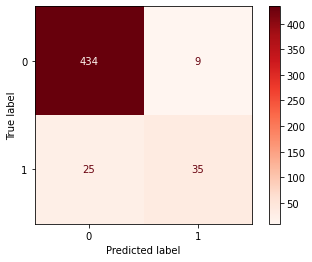

In [22]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(employee_logit, X_test_ss, y_test, cmap='Reds');

The model predicted 434 True Negatives, 35 True Positives, 25 False Positive and 9 False Negatives. 

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.

In [23]:
# Classification report
from sklearn.metrics import classification_report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       443
           1       0.80      0.58      0.67        60

    accuracy                           0.93       503
   macro avg       0.87      0.78      0.82       503
weighted avg       0.93      0.93      0.93       503



From the unsampled data classification report we observed that the precision rate of the model at predicting attrition is 84% and the recall rate is 53% and f1-score is 65%.

From the Upsampled data classification report we observed that the precision rate of the model at predicting attrition is 80% and the recall rate is 58% and f1-score is 67%.

We can observe a significant improvement in the recall score from 53% to 58%, this is good for us because the model has become better at detecting attrition overall. The f1-score also improved from 65% to 67% and this is significantly good as our model has moved in the right direction towards lowering the amount of false positives and false negatives.

Although the precision score has declined from 84% to 80%, this has occured as a trade off with the improvements in recall and nonetheless 80% is still a good enough precison score 


#### In effort to further enchance our model performance we will attempt to optimize our model hyperparameters and evaluate the performance results. In this case, we will be optimizing the Logistic Regression C-value.

### Hyperparameter Optimization

We'll take our train data and split it to create a validation dataset from it. 
* Train + Validation Sets: 80%
* Test Set: 20%

Since our test data has been seperated already we will go ahead and split the upsampled train dataset and create a validation dataset

In [24]:
# Splitting the remainder in two chunks
X_train_new, X_validation, y_train_new, y_validation = \
    train_test_split(X_train_sm, y_train_sm, test_size = 0.3,
                     random_state=1)

In [25]:
print(f'Shape of test set: {X_test.shape}')
print(f'Shape of validation set: {X_validation.shape}')
print(f'Shape of train set: {X_train_new.shape}')

Shape of test set: (503, 49)
Shape of validation set: (621, 49)
Shape of train set: (1447, 49)


In [26]:
# scale the sampled train data and transform the validation data
ss_sm2 = StandardScaler().fit(X_train_new)
X_train_new_ss = ss_sm2.transform(X_train_new)
X_validation_ss = ss_sm2.transform(X_validation)


In [27]:
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train_new_ss,y_train_new)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train_new_ss,y_train_new))
    # score on validation set
    validation_scores.append(my_logreg.score(X_validation_ss,y_validation))
    

/Users/tawandanigelchitapi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tawandanigelchitapi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

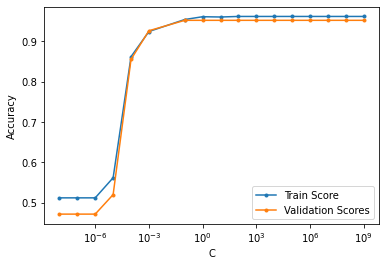

In [28]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

From the plot above we can observe that the preferred  optimized c-value is [10^(-1)] or 0.1. At this point our model is not overfitting, the validation score is slightly above the train score. Both the train score and validation score sit at about 93% accuracy. These are significantly high accuracy scores, they  good enough for us to accept and trust our model performance.

However, we will now re-model with the preferred c-value and compare the test accuracy scores with the test score of the non-optimized c-value. There after we will re-evaluate the model performance and assess results.

In [29]:
# now we will run our model with the newly identified c-value
my_optimized_employee_model = LogisticRegression(C=0.1,random_state=1)

# Remember that X_train_sm and y_train_sm held the data I split into train_new and validation
# I can use that data to re-train my model
my_optimized_employee_model.fit(X_train_sm_ss,y_train_sm)
my_optimized_employee_model.score(X_test_ss,y_test)

0.9324055666003976

Test score has remained at **93% accuracy** after optimizing our c-value, (the logistic regression hyperparameter)

### Evaluation on Test Data - After optimizing hyperparameter (c-value)

In [30]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

In [31]:
# predict classification
y_test_pred = my_optimized_employee_model.predict(X_test_ss)

Generate the (raw) confusion matrix:

In [32]:
cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[435,   8],
       [ 26,  34]])

In [33]:
# confusion matrix
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,435,8
true 1,26,34


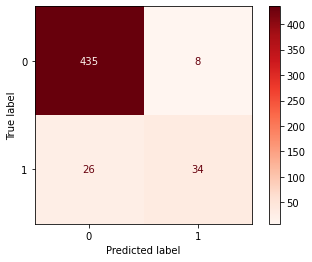

In [34]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(my_optimized_employee_model, X_test_ss, y_test, cmap='Reds');

The model predicted 435 True Negatives, 34 True Positives, 26 False Positive and 8 False Negatives. 

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.

In [35]:
# Classification report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       443
           1       0.81      0.57      0.67        60

    accuracy                           0.93       503
   macro avg       0.88      0.77      0.81       503
weighted avg       0.93      0.93      0.93       503



From the Upsampled data classification report we observed that the precision rate of the model at predicting attrition is 80% and the recall rate is 58% and f1-score is 67%.

After optimizing the hyperparameter c-value, the precision score has increase by 1% point from 80% to 81%, the recall score has decreased by 1 percentage point from 58% to 57% and the f1-score has remained the same at 67%.

With an increase in precision score and a decrease in recall score the f1-score which is the harmonic mean of the precision and recall scores has remained the same at 67%, the model is still performing really well.

#### We will attempt one more method to optimize hyperparameters, we will employ a pipeline grid search and which will yeaild the best hyperparameter values to use in our model. After yeilding the best estimators, we will re-model our data and evaluate results

### Now we wil employ a pipeline GridSearch to determine the best estimators and prevailing parameters. 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [37]:
# estimators
# note that all the planned steps must be included, but the second elements in each tuple are more like placeholders
estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', LogisticRegression())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
    
    # logistic regression with L1 regularization
    {
        'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'model': [LogisticRegression()],
        'model__penalty': ['l1'],
        'model__solver': ['liblinear'],
        'model__C': np.logspace(-5, 5, 11),
        'model__random_state': [1]
    },
    
    # logistic regression with L2 penalty
    {
        'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [1, 2, 3, 4, 5,6, 7, 8, 9, 10],
        'model': [LogisticRegression()],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__C': np.logspace(-5, 5, 11),
        'model__random_state': [1]
    }
]

# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid.fit(X_train_sm, y_train_sm);

Fitting 5 folds for each of 440 candidates, totalling 2200 fits
[CV 5/5] END model=LogisticRegression(), model__C=1e-05, model__penalty=l1, model__random_state=1, model__solver=liblinear, reduce_dim=PCA(), reduce_dim__n_components=1, scaling=MinMaxScaler();, score=0.499 total time=   0.0s
[CV 4/5] END model=LogisticRegression(), model__C=1e-05, model__penalty=l1, model__random_state=1, model__solver=liblinear, reduce_dim=PCA(), reduce_dim__n_components=2, scaling=StandardScaler();, score=0.501 total time=   0.0s
[CV 5/5] END model=LogisticRegression(), model__C=1e-05, model__penalty=l1, model__random_state=1, model__solver=liblinear, reduce_dim=PCA(), reduce_dim__n_components=3, scaling=MinMaxScaler();, score=0.499 total time=   0.0s
[CV 4/5] END model=LogisticRegression(), model__C=1e-05, model__penalty=l1, model__random_state=1, model__solver=liblinear, reduce_dim=PCA(), reduce_dim__n_components=4, scaling=MinMaxScaler();, score=0.501 total time=   0.0s
[CV 5/5] END model=LogisticReg

After fitting the grid to the training data, use the `best_estimator_` attribute on your grid search object to obtain the most optimal model and its parameters. 

In [38]:
# check the most optimal model
grid.best_estimator_

Pipeline(steps=[('scaling', MinMaxScaler()),
                ('reduce_dim', PCA(n_components=10)),
                ('model', LogisticRegression(C=0.1, random_state=1))])

The best estimator recommended to us requires us to the MinMaxScaler, perform dimension reduction 10 components, using logistric regression with a c-value of 0.1 and a random state of 1.

We will now implement these recommendations and evaluate our model.

### Now using our best estimator we will re-run our model with the specified parameters and evaluate the model

In [39]:
from sklearn.preprocessing import MinMaxScaler 

# 2. make a scaler & fit
my_minmax_scaler = MinMaxScaler().fit(X_train_sm)


# transfor the scaler
X_train_sm_sc = my_minmax_scaler.transform(X_train_sm)
X_test_sc = my_minmax_scaler.transform(X_test)


In [40]:
# Instantiate and fit
my_PCA = PCA(n_components = 10)
my_PCA.fit(X_train_sm_sc)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_sm_sc)
X_test_PCA = my_PCA.transform(X_test_sc)

In [41]:
my_final_employee_model = LogisticRegression(C=0.1,random_state=1)

# Remember that X_train_sm and y_train_sm held the data I split into train_new and validation
# I can use that data to re-train my model
my_final_employee_model.fit(X_train_PCA,y_train_sm)
my_final_employee_model.score(X_test_PCA,y_test)

0.9005964214711729

The test score is 90% which is 3 percentage points from our previous 93% score that we got when we manually optimized the c-value hyperparameter

### Evaluation on Test Data - After determing the best estimators and fitting the parameters in the Logistic Regression Model 

In [42]:
# class distribution
display(y_test.value_counts())

0    443
1     60
Name: Attrition, dtype: int64

In [43]:
# predict classification
y_test_pred = my_final_employee_model.predict(X_test_PCA)

Generate the (raw) confusion matrix:

In [44]:
cf_test = confusion_matrix(y_test, y_test_pred)
cf_test

array([[424,  19],
       [ 31,  29]])

In [45]:
# confusion matrix
conmat = pd.DataFrame(
    data = cf_test,
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

,predicted 0,predicted 1
true 0,424,19
true 1,31,29


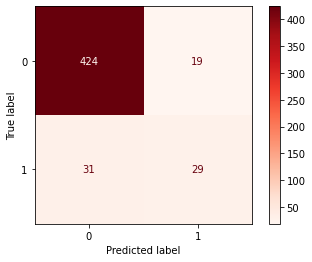

In [46]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(my_final_employee_model, X_test_PCA, y_test, cmap='Reds');

The model predicted 424 True Negatives, 29 True Positives, 31 False Positive and 19 False Negatives. 

This model yielded an increased number false positive and false negatives, the amount of true positive decreased.

The raw numbers themselves do not tell us much of a comprehensive story behind the performance of our model and so we will generate a classification report that will provide more information about, model precisio, recall, f1-score and accuracy.

In [47]:
# Classification report

cf_test_report = classification_report(y_test, y_test_pred)
print(cf_test_report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       443
           1       0.60      0.48      0.54        60

    accuracy                           0.90       503
   macro avg       0.77      0.72      0.74       503
weighted avg       0.89      0.90      0.90       503



After optimizing the hyperparameters using a pipeline GridSearch, the precision rate fell from 81% to 60%, the recall score fell from 57% to 48% and the f1-score fell from 67% down to 54%.

Judging from the results, this optimazation performed worse than our manual optimization and with that, we will stick to the previous model, as it performs better.





This model will end here, Another model, the Decision tree model will be applied in a different notebook and results will be compared in order to decide which model best predicts employee attrition.